In [10]:
# import packages
import pandas as pd # For reading and manipulating 2D data (like spreadsheets)
import numpy as np # For doing numerical calculations (literally NUMerical PYthon)
import matplotlib.pyplot as plt # For making graphs

from sklearn import datasets, linear_model

# Setting to show graphs below cells in colab
%matplotlib inline

In [11]:
temp = pd.read_csv(r"../data/Temp.csv")
temp = temp.loc[temp["Year"] >= 1880]
temp["Temp + 0.5"] = temp["Temp"] + 0.5
temp["Temp cum"] = temp["Temp + 0.5"].cumsum()

sea = pd.read_csv(r"../data/Sea.csv")
sea = sea.loc[sea["Year"] >= 1880]

joint = pd.merge(temp, sea, on='Year', how='inner')
joint = joint.dropna()

joint

,Year,Temp,Temp + 0.5,Temp cum,Sea
0,1880,-0.315832,0.184168,0.184168,-180.236283
1,1881,-0.232246,0.267754,0.451922,-173.039065
2,1882,-0.295530,0.204470,0.656392,-191.580733
3,1883,-0.346474,0.153526,0.809918,-190.455727
4,1884,-0.492320,0.007680,0.817598,-166.597397
...,...,...,...,...,...
136,2016,0.932927,1.432927,59.874433,56.330711
137,2017,0.845174,1.345174,61.219607,55.112391
138,2018,0.762654,1.262654,62.482262,52.083272
139,2019,0.891073,1.391073,63.873334,60.980739


In [12]:
temp_array = joint["Temp cum"].to_numpy().reshape(-1, 1)
sea_array = joint["Sea"].to_numpy().reshape(-1, 1)

regr = linear_model.LinearRegression(fit_intercept=True)
model_4 = regr.fit(temp_array, sea_array)
print(f"The model [ y = {regr.coef_[0][0]} x + {regr.intercept_[0]}] has score " + 
      f"{regr.score(temp_array, sea_array)}.")


The model [ y = 3.700447906789256 x + -153.95946002003097] has score 0.9636086955306171.


/var/folders/kc/xbj2q99s7135d7p12_42vy200000gn/T/ipykernel_93367/1597686766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Temp + 0.5"] = temp["Temp"] + 0.5
/var/folders/kc/xbj2q99s7135d7p12_42vy200000gn/T/ipykernel_93367/1597686766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Temp cum"] = temp["Temp + 0.5"].cumsum()


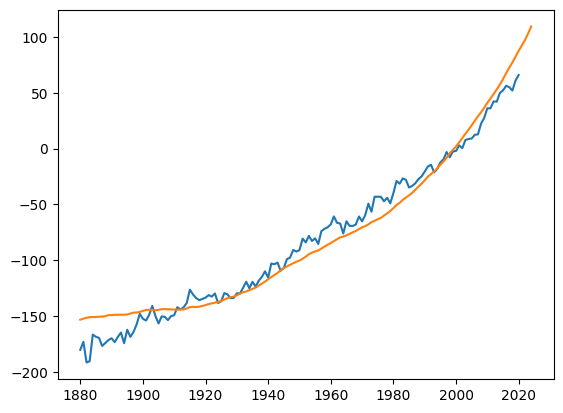

In [13]:
def temp_to_sea(temp):
    temp = temp.loc[temp["Year"] >= 1880]
    temp["Temp + 0.5"] = temp["Temp"] + 0.5
    temp["Temp cum"] = temp["Temp + 0.5"].cumsum()
    predict_array = model_4.predict(np.array(temp["Temp cum"]).reshape(-1,1)).flatten()

    sea_predict = pd.DataFrame(
        {
            "Year": [t for t in range(1880, temp["Year"].values[-1]+1)],
            "Sea": [h for h in predict_array],
        }
    )

    return sea_predict

# inspect the fit in historical data
temp = pd.read_csv(r"../data/Temp.csv")
sea_predict = temp_to_sea(temp)
plt.plot(np.asarray(joint["Year"], float), joint["Sea"])
plt.plot(np.asarray(sea_predict["Year"], float), sea_predict["Sea"])
plt.show()